<a href="https://colab.research.google.com/github/Hamashyach/AnaliseDeDados2/blob/main/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vendas Automotivas

#Descrição geral:

Base de dados com registros de pedidos realizados em uma empresa do setor automobilístico. Permite avaliar o desempenho de vendas, perfis de clientes e padrões de compra.

#Dicionário de dados traduzido:

- ORDERNUMBER: Número de identificação do pedido.
- QUANTITYORDERED: Quantidade de itens solicitados
- PRICEEACH: Preço unitário de cada item.
- ORDERLINENUMBER: Número da linha dentro do pedido.
- SALES: Total da venda (quantidade × preço).
- ORDERDATE: Data do pedido.
- DAYS_SINCE_LASTORDER: Dias desde o último pedido do cliente.
- STATUS: Status do pedido (ex: Enviado, Em Processamento, Cancelado).
- PRODUCTLINE: Categoria do produto.
- MSRP: Preço de venda sugerido pelo fabricante.
- PRODUCTCODE: Código do produto.
- CUSTOMERNAME: Nome do cliente.
- PHONE: Telefone de contato do cliente.
- ADDRESSLINE1: Endereço do cliente.
- CITY: Cidade do cliente.
- POSTALCODE: Código postal do cliente.
- COUNTRY: País do cliente.
- CONTACTLASTNAME: Sobrenome do contato.
- CONTACTFIRSTNAME: Nome do contato.
- DEALSIZE: Tamanho do pedido (Pequeno, Médio, Grande).


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [7]:
df = pd.read_csv('/08_vendas_automotivas.csv')
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,11/11/2018,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,18/11/2018,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.84,14,4708.44,15/01/2019,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.18,1,3965.66,20/02/2019,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.44,7,2333.12,05/04/2019,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small


In [8]:
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 2747 entradas (registros) e 20 atributos (variáveis).

Os tipos dos atributos são do tipo:
ORDERNUMBER               int64
QUANTITYORDERED           int64
PRICEEACH               float64
ORDERLINENUMBER           int64
SALES                   float64
ORDERDATE                object
DAYS_SINCE_LASTORDER      int64
STATUS                   object
PRODUCTLINE              object
MSRP                      int64
PRODUCTCODE              object
CUSTOMERNAME             object
PHONE                    object
ADDRESSLINE1             object
CITY                     object
POSTALCODE               object
COUNTRY                  object
CONTACTLASTNAME          object
CONTACTFIRSTNAME         object
DEALSIZE                 object
dtype: object


In [9]:
print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
ORDERNUMBER,0.0
QUANTITYORDERED,0.0
PRICEEACH,0.0
ORDERLINENUMBER,0.0
SALES,0.0
ORDERDATE,0.0
DAYS_SINCE_LASTORDER,0.0
STATUS,0.0
PRODUCTLINE,0.0
MSRP,0.0


In [10]:
X = df.drop(columns=['SALES']).select_dtypes(include=['number'])
y = df['SALES'].astype(float)


#Separando Treino

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
def avaliar_modelo(y_true, y_pred, nome="Modelo"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

#Regressão Linear

In [15]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

pred_lr = modelo_lr.predict(X_test)
avaliar_modelo(y_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 409.38


#Árvore de Regressão

In [14]:
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train, y_train)

pred_tree = modelo_tree.predict(X_test)
avaliar_modelo(y_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 185.77


#Random Forest Regressor

In [13]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

pred_rf = modelo_rf.predict(X_test)
avaliar_modelo(y_test, pred_rf, "Random Forest")

Random Forest - RMSE: 115.57


Support Vector Regressor (SVR)

In [17]:
modelo_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
modelo_svr.fit(X_train, y_train)

pred_svr = modelo_svr.predict(X_test)
avaliar_modelo(y_test, pred_svr, "SVR")

SVR - RMSE: 503.47


#Comparando

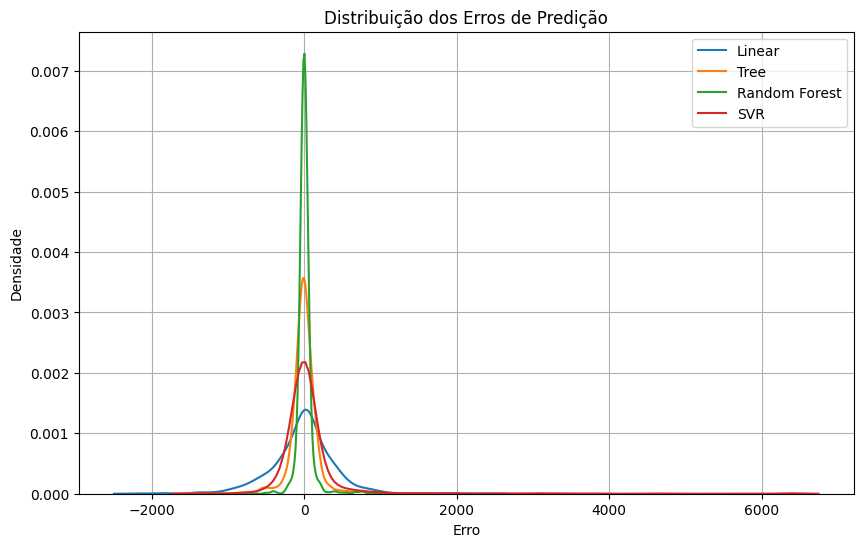

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test - pred_lr, label="Linear")
sns.kdeplot(y_test - pred_tree, label="Tree")
sns.kdeplot(y_test - pred_rf, label="Random Forest")
sns.kdeplot(y_test - pred_svr, label="SVR")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()

Aqui podemos analisar que Arvore de regressão e Random Forest são os modelos com melhor desempenho, suas curvas são mais altas e estreitas e centradas em 0, isso nos mostra que a maioria das previsões feitas por esse modelo tem erros menores.


In [19]:
X = df[['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']]
y = df['DEALSIZE']

In [20]:
#Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Separando Testes

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

#Algoritmos de Classificação

In [22]:
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=200),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

#Avaliação por modelo


 Regressão Logística
Acurácia : 0.99
Precisão : 0.99
Recall   : 0.97
F1-Score : 0.98


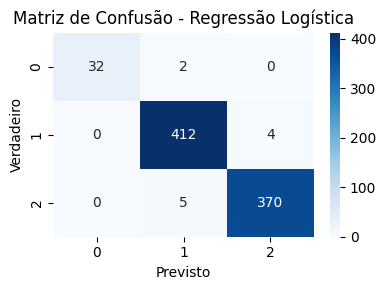


 Árvore de Decisão
Acurácia : 1.00
Precisão : 1.00
Recall   : 1.00
F1-Score : 1.00


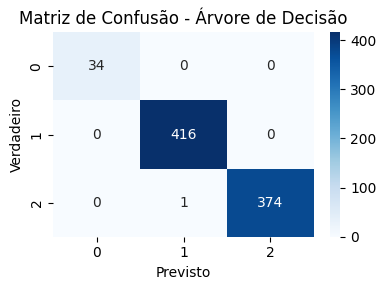


 Random Forest
Acurácia : 1.00
Precisão : 1.00
Recall   : 1.00
F1-Score : 1.00


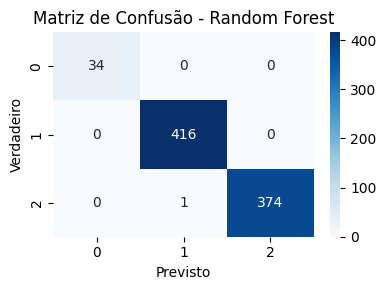


 SVM
Acurácia : 0.97
Precisão : 0.96
Recall   : 0.96
F1-Score : 0.96


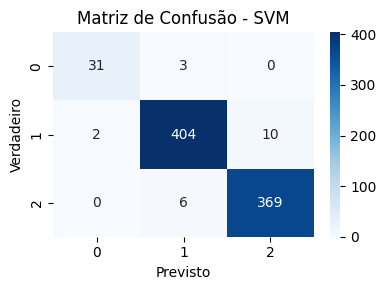


 K-NN
Acurácia : 0.93
Precisão : 0.92
Recall   : 0.92
F1-Score : 0.92


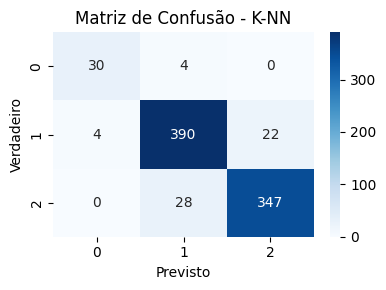

In [23]:
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n {nome}")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Matriz de confusão
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

Aqui também podemos ver que os algoritimos de Arvore de desição e Random Forest apresentam um ótimo desempenho, resultando 1.0 em todas as métricas, indicando serem os melhores na classificação do tamanho das vendas. Os outros também tiveram resultados muito fortes, como A regressão Logística que teve acurácia de 0.99.

#Defesa da escolha dos Hiperparâmetros

Para cada algoritmo, os hiperparâmetros foram definidos com base em valores padrão e pequenas variações justificadas pela lógica operacional de cada modelo, sempre respeitando os limites do conteúdo estudado em aula. Algumas escolhas são justificadas a seguir:

K-NN: foi realizado testes com k= 3, 5 e 7. O valore escolhido foi o k=5, pois apresentou os melhores resultados no conjunto de teste, com acurácia de 93% e o recall 92%, mostrando que teve a melhor capacidade de identificar corretamente as classes reais.

SVM / SVR: foi utilizado o kernel para ambas com o valor 1, isso permitiu um equilíbrio entre generalização e performance, o resultado obteve acurácia de 97%. Para o SVR usei C = 100, o que dá mais peso aos erros durante o treinamento e SVC usei o valor padrão C = 1.0, buscando um bom equilíbrio entre ajuste e generalização.

Random Forest: foi usado n_estimators=100, que ofereceu 100% de acurácia sem exigir ajustes adicionais. O modelo mostrou-se estável e preciso.

Árvore de Decisão: foi usado paramentros padrão, obtendo também acurácia de 100%. Isso indica que os dados possuem separabilidade clara.

Regressão Logística: O modelo foi utilizado com os parâmetros padrão da biblioteca scikit-learn, obtendo uma acurácia de 99%, com boa generalização.



#Análise e Interpretação dos resultados

A analise foi dividida em 2 partes, Modelos de regressão usando (SALES) e modelos de classificação usando (DEALSIZE).

Nos modelos de regressão, com base nos resultados obtidos, podemos ver que o Random Forest apresentou os melhores resultados, RMSE: 115.57, sendo ele o menor, isso indica que ele é o modelo mais preciso na previsão de vendas. A Arvore de Regressão também demostrou boa perfomance com RMSE: RMSE: 185.77. No gráfico podemos notar com Randon Forest e Arvore de Desisão possuem curvas mais altas e estreitas do que as outras, indicando que tenden a cometer menos erros.

Nos algoritimos de classificação, utilizando as métricas de acurácia, precisão, recall, f1-score e as mátrizes de confusão, notamos que a Arvore de decisão e Random Forest alcançaram um desempenho perfeito em todas as métricas, indicando que esses modelos foram capazes de categorizar os tamanhos dos negócios com 100% de precisão no conjunto de testes. O K-NN, mesmo tendo sido o que apresentou menor desempenho entre os classificadores, com acurácia de 0.93, ainda assim obteve um resultado considerado alto, o que pode indicar que o número de vizinhos selecionado pode ter impactado o resultado.

#Conclusão Geral

Com base em todos os resultados obtidos, a conclusão é que os modelos baseados em árvores, Random Forest e Árvore de Decisão, se destacam consistentemente como os mais eficazes para as ambas as tarefas de regressão, usando SALES, e classificação do tamanho do negócio, usando DEALSIZE, eles mostraram um desempenho mais consistente e eficaz ao lidar com os padrões presentes no conjunto de dados.

Esse resultado reforça a ideia de que os dados automotivos analisados possuem relações complexas e não lineares, que os algoritmos de árvore conseguem capturar de forma mais precisa. Embora modelos como Regressão Linear e SVR tragam uma abordagem mais tradicional, e Regressão Logística e SVM tenham apresentado bons resultados para classificação, os modelos de árvore demonstraram uma superioridade clara na hora de representar essas nuances.
